# Credit Risk Analysis

O **risco de crédito** é um dos maiores desafios enfrentados pelas instituições financeiras, pois o descumprimento das condições de pagamento pode levar a **perdas financeiras significativas**. A capacidade de avaliar se um usuário é capaz de cumprir suas obrigações financeiras é fundamental para o sucesso das instituições financeiras e, como resultado, soluções cada vez mais avançadas vêm sendo desenvolvidas para minimizar o risco de inadimplência.

Um termo comum usado para descrever a inadimplência é *default*, que se refere à incapacidade do mutuário de cumprir suas obrigações financeiras. Normalmente, o não pagamento é devido à incapacidade financeira do cliente, que pode ser causada por uma variedade de fatores, incluindo perda de emprego, doença ou eventos imprevistos.


<p align=center>
  <img src="https://img.freepik.com/free-photo/risk-gamble-opportunity-swot-weakness-unsure-concept_53876-122989.jpg?w=996&t=st=1683329456~exp=1683330056~hmac=d405c3779980dea9df9b0a2fff0fe7e94f58f5a8a185690dcc2dd79ff1502ef2" width="70%">
</p>
 
Grandes bancos e *Fintechs* estão investindo cada vez mais em modelos de Machine Learning para prevenir a inadimplência de alguns clientes. Esses modelos usam dados de histórico de pagamento, pontuação de crédito, renda e outras informações para avaliar o risco de inadimplência de um cliente e tomar decisões informadas sobre empréstimos e investimentos.

Nesse contexto, o **objetivo** deste projeto é utilizar os dados da instituição financeira *Nubank* para realizar uma análise de dados e desenvolver um modelo eficaz que possa prever com precisão se um cliente será ou não inadimplente. Esse modelo pode ajudar a instituição financeira a **tomar decisões mais informadas** e reduzir o **risco de perdas financeiras decorrentes da inadimplência**.

## Aquisição dos Dados

O conjunto de dados a ser utilizado neste Projeto de Data Science parte de uma competição realizada pela **Startup Nubank** a fim de revelar talentos e potenciais contratações pela *Fintech*. Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). 

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [113]:
# Importação de bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.0f}'.format

from sklearn.preprocessing import LabelEncoder, StandardScaler

In [114]:
# importar os dados
DATA_PATH = "http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0"
df = pd.read_csv(DATA_PATH)

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* `ids`: ID único do candidato.
* `target_default`: variável alvo indicando se o candidato é um bom pagador (0) ou se ele entrou em inadimplência (1).
* `score_1 a score_6`: valores de pontuação de diferentes fontes.
* `risk_rate`: taxa de risco do candidato.
* `last_amount_borrowed`: valor do último empréstimo solicitado.
* `last_borrowed_in_months`: número de meses desde que o último empréstimo foi solicitado.
* `credit_limit`: limite de crédito do candidato.
* `reason`: razão para solicitação do empréstimo.
* `income`: renda declarada pelo candidato.
* `facebook_profile`: indica se o candidato tem um perfil no Facebook associado à sua conta.
* `state`: estado em que o candidato reside.
* `zip`: código postal do candidato.
* `channel`: canal pelo qual o candidato se inscreveu.
* `job_name`: nome da profissão do candidato.
* `real_state`: status do imóvel do candidato.
* `ok_since`: número de meses desde que o candidato forneceu uma resposta satisfatória.
* `n_bankruptcies`: número de falências anteriores do candidato.
* `n_defaulted_loans`: número de empréstimos inadimplentes do candidato.
* `n_accounts`: número de contas abertas pelo candidato.
* `n_issues`: número de problemas relatados pelo candidato.
* `application_time_applied`: hora em que o candidato fez a inscrição.
* `application_time_in_funnel`: tempo que o candidato passou no funil de inscrição.
* `email`: endereço de e-mail do candidato.
* `external_data_provider_credit_checks_last_2_year`: número de verificações de crédito nos últimos dois anos.
* `external_data_provider_credit_checks_last_month`: número de verificações de crédito no último mês.
* `external_data_provider_credit_checks_last_year`: número de verificações de crédito no último ano.
* `external_data_provider_email_seen_before`: indica se o endereço de e-mail do candidato já foi visto antes.
* `external_data_provider_first_name`: primeiro nome do candidato em uma fonte externa.
* `external_data_provider_fraud_score`: pontuação de fraude do candidato em uma fonte externa.
* `lat_lon`: coordenadas geográficas do candidato.
* `marketing_channel`: canal de marketing pelo qual o candidato foi adquirido.
* `profile_phone_number`: número de telefone do candidato.
* `reported_income`: renda relatada pelo candidato.
* `shipping_state`: estado para o qual o produto será enviado.
* `shipping_zip_code`: código postal para o qual o produto será enviado.
* `profile_tags`: tags associadas ao perfil do candidato.
* `user_agent`: informações sobre o navegador e o dispositivo do candidato.
* `target_fraud`: variável alvo indicando se o candidato é fraudulento (1) ou não (0).

## Análise Exploratória dos Dados

Na análise exploratória de dados será efetuada uma explanação inicial das variáveis contidas na dataset, e entenderemos dados referentes a:

* *Contexto geral das variáveis*
* *Porcentagem de itens nulos*
* *Balanceamento do dataset*
* *Cancelamento em relação ao gênero*
* *Cancelamento em relação ao valor pago mensalmente*
* *Boxplot para variáveis numéricas*


Primeiramente, observaremos como estão dispostas as cinco primeiras entradas do dataset para ter uma visão ampla da estrutura de dados.

In [115]:
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350,102,0,108,0,25034,36,0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0,0,18,18,07:52:34,444,outlook.com,NaN,2,0,51,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370,97,1,92,0,NaN,NaN,39726,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100019,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50,0,0,14,14,02:34:29,346,gmail.com,0,1,0,17,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360,100,0,113,0,7208,36,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65024,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0,0,10,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510,102,1,95,0,NaN,NaN,54591,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1,0,19,19,11:20:49,406,spgov.com,NaN,3,NaN,38,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500,98,1,118,0,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0,0,11,NaN,13:39:03,240,gmail.com,0,2,1,46,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Logo de início, pode-se fazer algumas observações:
* A variável `ids` serve como identificador único.
* A variável `target_default` é a variável alvo, que indica a probabilidade do cliente ser inadimplente.
* A variável `target_fraud` possivelmente foi variável alvo em outro modelo e indica a probabilidade de o cliente ser fraudulento.
* `Score_1 a 2` são strings, mas `score_3 a 6` são numéricos.


Verificarei agora o tamanho do dataset.

In [116]:
# verifica o tamanho do dataset
print("Entradas:", df.shape[0])
print("Variáveis:", df.shape[1])

Entradas: 45000
Variáveis: 43


In [117]:
# Extrair o nome das colunas
df.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [118]:
# Extrair o tipo das variáveis
df.dtypes

ids                                                  object
target_default                                       object
score_1                                              object
score_2                                              object
score_3                                             float64
score_4                                             float64
score_5                                             float64
score_6                                             float64
risk_rate                                           float64
last_amount_borrowed                                float64
last_borrowed_in_months                             float64
credit_limit                                        float64
reason                                               object
income                                              float64
facebook_profile                                     object
state                                                object
zip                                     

A priori, as variáveis aparentam ter o tipo de dado coerente. Irei verificar agora a porcentagem de itens nulos.

In [119]:
# Porcentagem de item nulo
round(df.isnull().sum()/df.shape[0], 2).sort_values(ascending = False)

target_fraud                                       1
last_amount_borrowed                               1
last_borrowed_in_months                            1
ok_since                                           1
external_data_provider_credit_checks_last_2_year   0
external_data_provider_credit_checks_last_year     0
credit_limit                                       0
n_issues                                           0
facebook_profile                                   0
marketing_channel                                  0
job_name                                           0
target_default                                     0
external_data_provider_email_seen_before           0
lat_lon                                            0
user_agent                                         0
n_bankruptcies                                     0
zip                                                0
n_defaulted_loans                                  0
channel                                       

Foi possível notar que:
* A variável `target_fraud` possui 97% dos itens nulos.
* As variáveis `last_amount_borrowed ` e `last_borrowed_in_months` possuem 67% dos itens nulos.
* As variáveis `ok_since` e `external_data_provider_credit_checks_last_2_year` possuem mais que 50% dos itens nulos.

Os dados ausentes precisam ser tratados, posteriormente farei uma análise mais aprofundada para verificar a relevância das variáveis e a forma mais adequada de corrigi-los.

Veremos também o balanceamento da variável alvo `target_default`.

In [120]:
# Quantidade de dados distribuidos por classes
df.target_default.value_counts()

False    35080
True      6661
Name: target_default, dtype: int64

In [121]:
# Porcentagem de dados distribuidos por classes
round(df.target_default.value_counts()/df.shape[0] * 100,2)

False   78
True    15
Name: target_default, dtype: float64

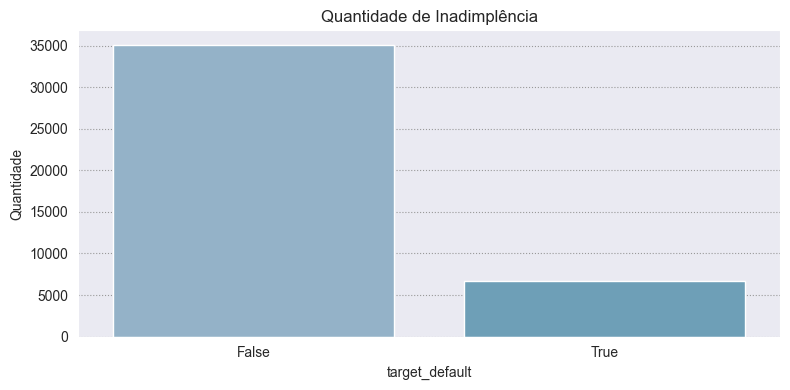

In [122]:
# Plotar um gráfico de barras para ver o balanceamento do *dataset*
fig, ax = plt.subplots(figsize=(8, 4))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_palette("PuBuGn_d")
count = df['target_default'].value_counts()
sns.countplot(x='target_default', data=df)
ax.set_xlabel('target_default')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de Inadimplência');
plt.tight_layout()

O dataset é  **desbalanceado**, com 14.80% de inadimplência. Uma consequência de ter dados desbalanceados é um **modelo enviesado**, que privilegia a classe maioritária. Logo, é necessário um **balanceamento** a fim de construir um modelo eficaz ao problema.


Como há uma quantidade considerável de variáveis, optei por dividi-las em grupo a fim de realizar uma análise minuciosa.

### Grupo 1: Variáveis Demográficas e de Comportamento

Este grupo inclui variáveis que descrevem as características demográficas e comportamentais dos candidatos. Essas variáveis são coletadas no momento da solicitação do empréstimo e podem incluir informações como a razão para o empréstimo `razão`, a renda do candidato `income`, se o candidato possui um perfil no Facebook `facebook_profile`, estado e código postal `state, zip`, canal de aquisição do cliente `channel`, profissão do candidato `job_name`, tipo de imóvel em que o candidato reside `real_state`, número de falências anteriores `n_bankruptcies`, número de empréstimos inadimplentes anteriores `n_defaulted_loans`, número de contas bancárias abertas `n_accounts`, número de problemas relatados `n_issues`, tempo de aplicação `application_time_applied`, tempo desde o início do processo de empréstimo `application_time_in_funnel`, endereço de e-mail `email`, localização geográfica do candidato `lat_lon`, canal de marketing `marketing_channel`, número de telefone do candidato `profile_phone_number`, renda relatada pelo candidato `reported_income`, estado de envio `shipping_state`, código postal de envio `shipping_zip_code`, tags de perfil `profile_tags` e tipo de navegador usado pelo candidato `user_agent`.

In [123]:
df_group1 = df[['reason', 'income', 'facebook_profile', 'state', 'zip', 'channel', 'job_name', 
    'real_state', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues', 
    'application_time_applied', 'application_time_in_funnel', 'email', 'lat_lon', 
    'marketing_channel', 'profile_phone_number', 'reported_income', 'shipping_state', 
    'shipping_zip_code', 'profile_tags', 'user_agent']].copy()

Agora verificarei as informações estatísticas das variáveis.

In [126]:
# Verificar informações estatísticas
df_group1.describe()

,income,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,reported_income,shipping_zip_code
count,44438,44303,44426,44438,33456,45000,45000,45000
mean,71607,0,0,11,11,248,inf,33924
std,51859,0,0,5,5,146,NaN,12692
min,4821,0,0,0,0,0,403,12001
25%,45011,0,0,7,8,120,50948,22937
50%,61267,0,0,10,10,248,101779,33896
75%,86019,0,0,13,14,375,151337,44910
max,5000028,5,5,49,49,500,inf,56000


Pode-se perceber que :
* Há uma grande presença de *outliers* na variável `income`,onde a mediana da renda é 61267, mas o valor máximo está em 5000028.
* O valor máximo da variável `reported_income` não é um valor válido, sendo infinito.
* A maior parte dos usuários não teve falências anteriores, por `n_bankruptcies`.
* A maior parte dos usuários não teve inadimplência por `n_defaulted_loans`.
* Os valores de renda reportados pelos usuários em `reported_income` tem características diferentes que a renda real em `income`.

Primeiramente, iremos observar a variável `income` plotando um histograma para a mesma.

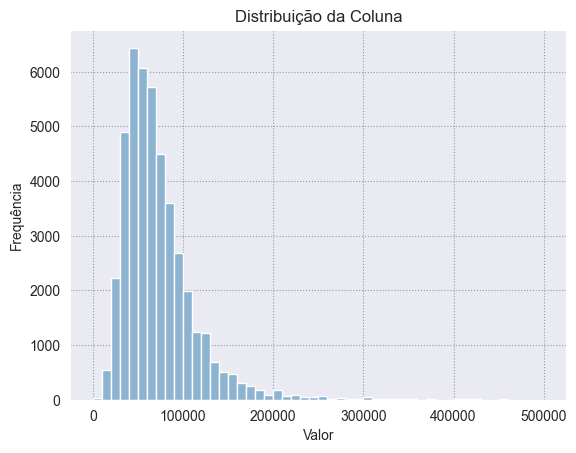

In [154]:
# definindo a quantidade de bins e range do histograma
num_bins = 50
range_values = (0, 500000)

# plotando o histograma
df.income.hist(bins=num_bins, range=range_values)

# adicionando títulos e labels
plt.title('Distribuição da Coluna')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.show()

Pelo histograma pode-se perceber que a frequência da renda começa a decair quando ultrapassa 200000. Plotarei um boxplot contendo o dataset original e o dataset com a renda inferior a tal quantia.

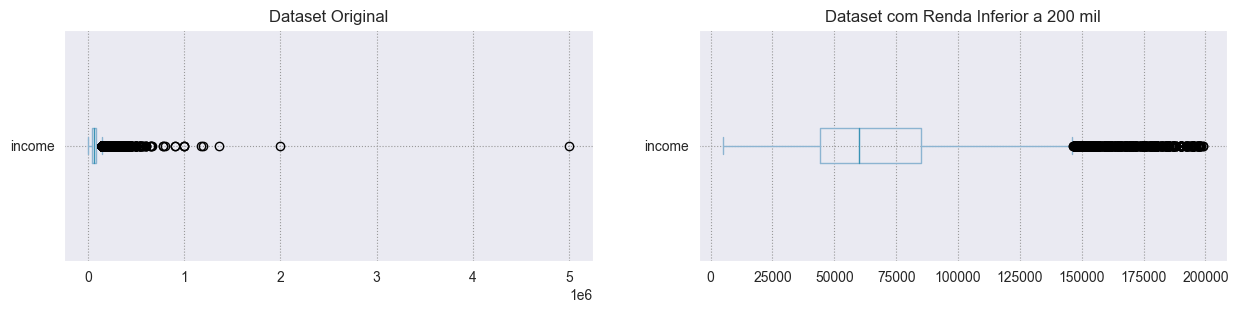

777 Entradas acima de 200 mil
Representam 1.73% do dataset


In [153]:
# verificar o conjunto de dados original
fig, ax = plt.subplots(1, 2, figsize=(15,3))
df.income.plot(kind='box', vert=False, ax = ax[0]);
df.income.loc[df.income <= 200000].plot(kind='box', vert=False, ax = ax[1]);
ax[0].set_title('Dataset Original')
ax[1].set_title('Dataset com Renda Inferior a 200 mil')
plt.show()

print("{} Entradas acima de 200 mil".format(len(df[df.income > 200000])))
print("Representam {:.2f}% do dataset".format((len(df[df.income > 200000]) / df.shape[0])*100))

Pela visualização de dados, pode-se notar que a variável `income` possui uma grande presença de outliers. Há 777 entradas com renda acima de 200 mil, que representam 1.73% do dataset.

A variável `reported_income` possui valor inf em sua coluna, para corrigir o problema, irei alterar esse valor para o máximo presente na mesma e então plotar um gráfico de histograma a fim de entender melhor a frequência, bem como as informações estatísticas da variável.

In [152]:
# substituir valores inf por NaN
df['reported_income'] = df['reported_income'].replace([np.inf, -np.inf], np.nan)

# filtrar valores não nulos
filtered_df = df[df['reported_income'].notnull()]

# encontrar o valor máximo na coluna filtrada
max_income = filtered_df['reported_income'].max()

# substituir valores nulos pelo valor máximo encontrado
df['reported_income'] = df['reported_income'].fillna(max_income)

In [158]:
df.reported_income.describe()

count              45000
mean      19772675482698
std      353944922611180
min                  403
25%                50948
50%               101779
75%               151337
max     6355500000111444
Name: reported_income, dtype: float64

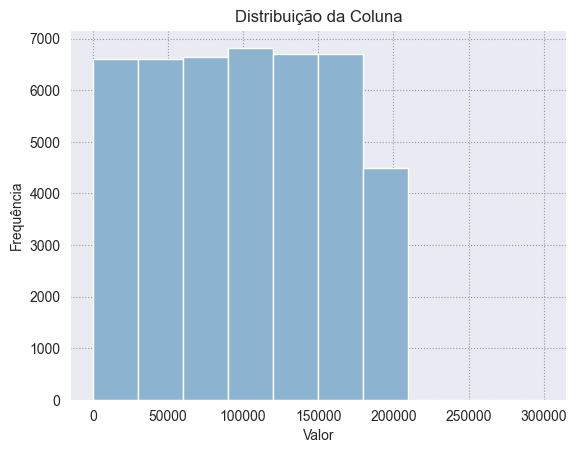

In [157]:
# definindo a quantidade de bins e range do histograma
num_bins = 10
range_values = (0, 300000)

# plotando o histograma
df.reported_income.hist(bins=num_bins, range=range_values)

# adicionando títulos e labels
plt.title('Distribuição da Coluna')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.show()

In [94]:
df.n_bankruptcies.value_counts()

0    40999
1     3248
2       44
3        7
4        3
5        2
Name: n_bankruptcies, dtype: int64

In [95]:
df.n_defaulted_loans.value_counts()

0    44252
1      152
2       17
3        4
5        1
Name: n_defaulted_loans, dtype: int64

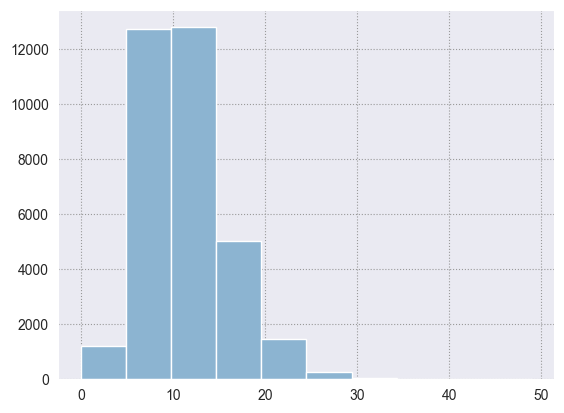

In [97]:
df.n_issues.hist();

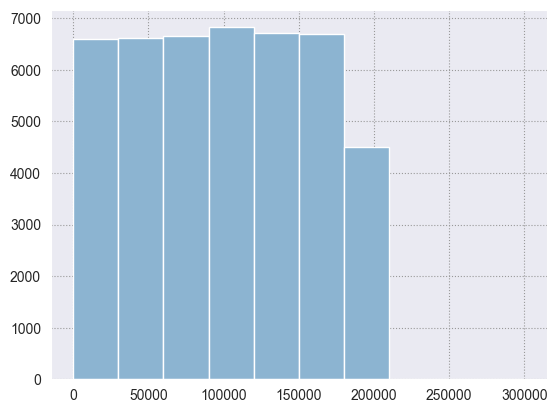

In [98]:
# definindo a quantidade de bins e range do histograma
num_bins = 10
range_values = (0, 300000)

df.reported_income.hist(bins=num_bins, range=range_values);

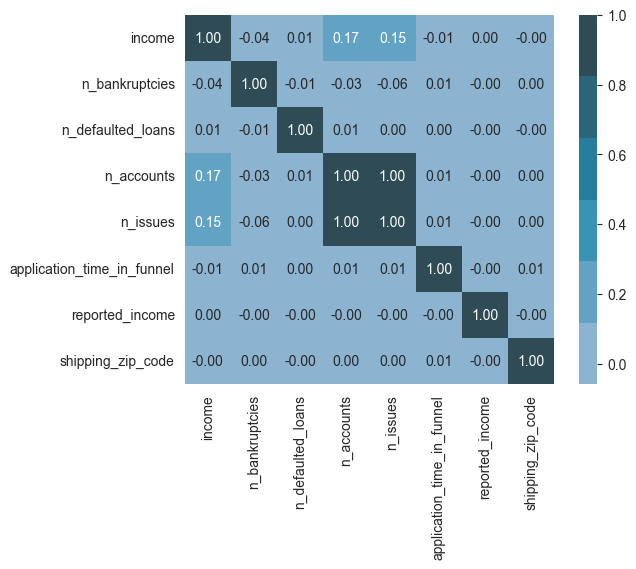

In [159]:
corr_df = df_group1.corr(method = 'pearson')
sns.heatmap(corr_df, fmt='.2f',square = True, linecolor = 'white', annot = True, cmap = sns.color_palette("PuBuGn_d"));

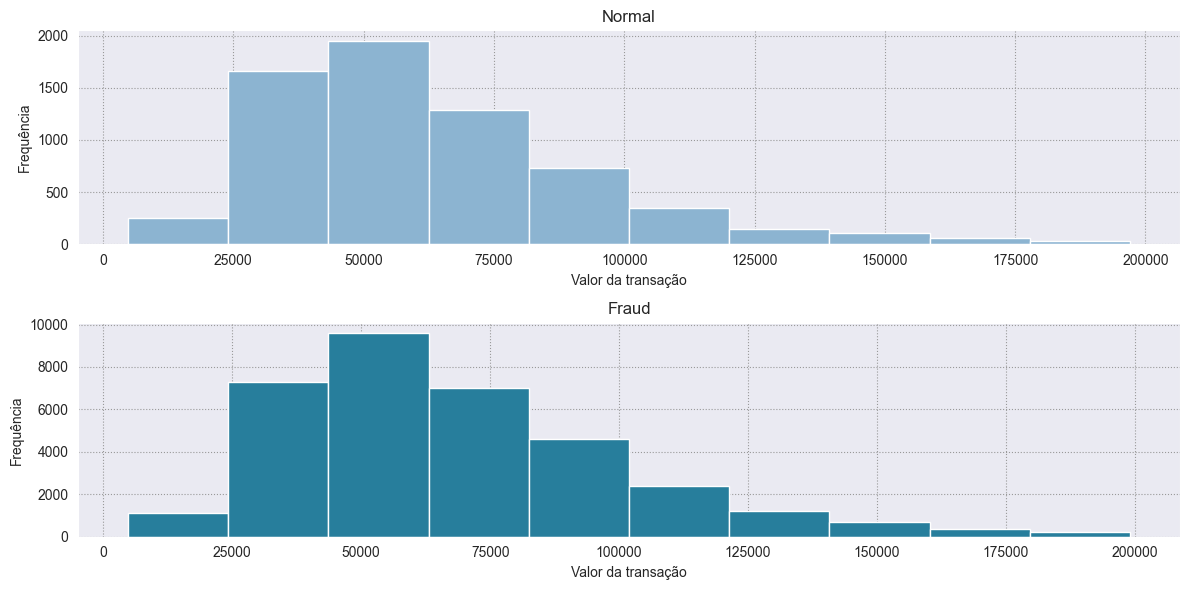

In [161]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))


ax[0].hist(df_group1.income[(df_group1.target_default == True) & (df_group1.income <= 200000)], color=sns.color_palette()[0])
ax[0].set_title('Normal')

ax[1].hist(df_group1.income[(df_group1.target_default == False) & (df_group1.income <= 200000)], color=sns.color_palette()[3])
ax[1].set_title('Fraud')

ax[0].set_xlabel('Valor da transação')
ax[0].set_ylabel('Frequência')

ax[1].set_xlabel('Valor da transação')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
